In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")



In [22]:

df = pd.read_csv("india_weather_data.csv", encoding='latin1')
print(df.columns)


Index(['date', 'latitude', 'longitude', 'wind_speed', 'cloud_cover',
       'precipitation_probability', 'pressure_surface_level', 'dew_point',
       'uv_index', 'heatwave', 'visibility', 'rainfall', 'solar_radiation',
       'snowfall', 'max_temperature', 'min_temperature', 'max_humidity',
       'min_humidity'],
      dtype='object')


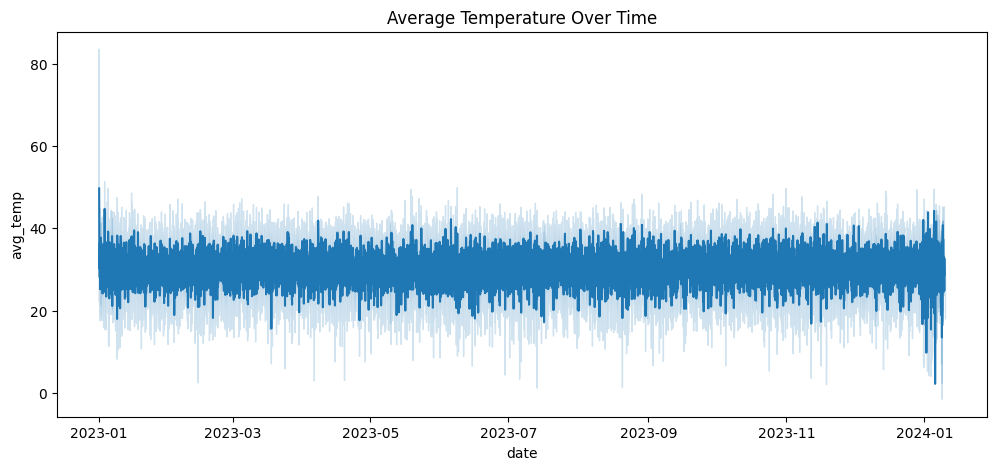

In [23]:

df = pd.read_csv("india_weather_data.csv", encoding='latin1')
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Create average temperature and humidity
df['avg_temp'] = (df['max_temperature'] + df['min_temperature']) / 2
df['avg_humidity'] = (df['max_humidity'] + df['min_humidity']) / 2

# Basic cleanup
df = df.dropna(subset=['avg_temp', 'avg_humidity', 'wind_speed'])

# Visualize average temperature trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='date', y='avg_temp')
plt.title("Average Temperature Over Time")
plt.show()


In [24]:
# Replace missing or invalid values in 'heatwave' with 0
df['heatwave'] = pd.to_numeric(df['heatwave'], errors='coerce')  # convert invalid values to NaN
df['heatwave'] = df['heatwave'].fillna(0).astype(int)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = df[['avg_temp', 'avg_humidity', 'wind_speed']]
target = df['heatwave']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced'
)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select features and target
features = df[['avg_temp', 'avg_humidity', 'wind_speed']]
target = df['heatwave'].astype(int)  # Ensure it's binary numeric

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save model for Streamlit
import joblib
joblib.dump(model, "heatwave_model.pkl")


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17886
           1       0.87      0.86      0.87      1488

    accuracy                           0.98     19374
   macro avg       0.93      0.93      0.93     19374
weighted avg       0.98      0.98      0.98     19374



['heatwave_model.pkl']

In [28]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the model again
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model inside your current environment
joblib.dump(model, "C:/Users/sahit/OneDrive/Documents/Desktop/internships/Next24tech/heatwave_model.pkl")


['C:/Users/sahit/OneDrive/Documents/Desktop/internships/Next24tech/heatwave_model.pkl']

In [38]:
sample_input = np.array([[42.0, 70.0, 12.0]])

# Predict
prediction = model.predict(sample_input)

# Output result
if prediction[0]:
    print("🚨 Heatwave Alert! High risk detected. Stay indoors, hydrate regularly, and avoid outdoor activity.")
else:
    print("✅ Conditions are safe. No heatwave predicted. Keep cool and carry on.")

✅ Conditions are safe. No heatwave predicted. Keep cool and carry on.
